In [16]:
#this is problem statement to predict the fare price of the flight
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Since data is in form of excel file we have to use pandas read_excel to load the data

In [2]:
train_data=pd.read_excel('F:/Ineuron_Internship_Project_Flight_Fare_Prediction/Dataset/Data_Train.xlsx')

In [3]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [4]:
'''After loading it is important to check null values in a column or a row If it is present then following can be done,
    a.Filling NaN values with mean, median and mode using fillna() method
    b.If Less missing values, we can drop it as well'''

'After loading it is important to check null values in a column or a row If it is present then following can be done,\n    a.Filling NaN values with mean, median and mode using fillna() method\n    b.If Less missing values, we can drop it as well'

In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.shape

(10683, 11)

In [7]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
data=train_data.copy()

In [11]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# Perform Featurization

In [12]:
#there are three columns in the dataset which are in datetime but are considered as object hence we need convert it

In [17]:
def change_into_datatime(col):
    data[col]=pd.to_datetime(data[col])

In [18]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [19]:
date_time_col=['Date_of_Journey','Dep_Time', 'Arrival_Time']

In [20]:
for feature in date_time_col:
    change_into_datatime(feature)

In [21]:

data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [22]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [23]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [24]:
#the date of journey column will be separated in three columns i.e day,month and year of the journey date and then that column will be dropped

In [25]:
data['journey_date']=data['Date_of_Journey'].dt.day

In [26]:
data['journey_month']=data['Date_of_Journey'].dt.month

In [27]:
data['journey_year']=data['Date_of_Journey'].dt.year

In [28]:
data.drop(columns='Date_of_Journey',inplace=True)

In [29]:
data.head(2)



,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-06-14 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-14 05:50:00,2023-06-14 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [30]:
#in dep time and arrival time the hour and minutes to another columns

In [31]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [32]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-14 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [33]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [37]:
!pip install cufflinks


     ---------------------------------------- 81.7/81.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68736 sha256=60eec9e923920699974d64b82c4884829d3a38b8f7b4c7a4222edcc2fdea9399
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [38]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [39]:
#now the duration hours will be separated according to the hours and minutes

In [40]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h ' + x
    elif 'm' not in x:
        x=x+' 0m'
    return x
    

In [41]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [42]:
data['Duration'][0].split(' ')[0]

'2h'

In [43]:
data['Duration'][0].split(' ')[1]

'50m'

In [44]:
data['Duration'][0].split(' ')

['2h', '50m']

In [45]:
'hello world'.split(' ')

['hello', 'world']

In [46]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [47]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [48]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [49]:
data['Duration_min']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [50]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


In [51]:
#a separate column which will give the whole duration in min will be formed

In [52]:
data['total_duration']=data['Duration_hours'].apply(lambda x:x*60)+data['Duration_min']

In [53]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,total_duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


In [54]:
data['total_duration'].dtype

dtype('int64')

In [55]:
# below analyses if total_duration impacts price or not


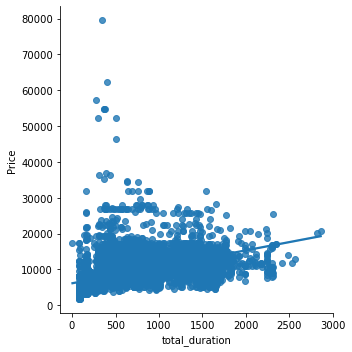

In [56]:
sns.lmplot(x='total_duration',y='Price',data=data)

In [57]:
## Conclusion-->> pretty clear that As the duration of minutes increases Flight price also increases.

In [58]:
#which city has maximum final destination of flights is determined using a bar plot

In [59]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<AxesSubplot:>

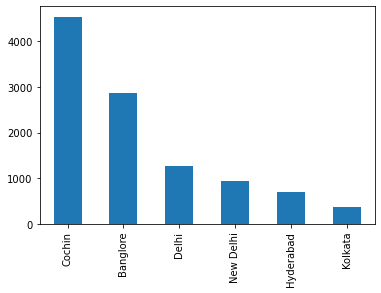

In [60]:
data['Destination'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Destination'>

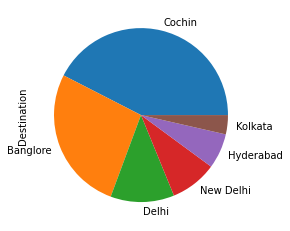

In [61]:
data['Destination'].value_counts().plot(kind='pie')

In [62]:
## conclusion-cochin will have the maximum final destination

 Exploratory Data Analysis(Bivariate Analysis) to come up with some business insights¶


Problem Statement-->> on which route Jet Airways is extremely used??? 

In [63]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [64]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [65]:
#route of CCU → BOM → BLR  will be the most used by jet airways

Airline vs Price Analysis


finding price distribution & 5-point summary of each Airline..

<AxesSubplot:xlabel='Airline', ylabel='Price'>

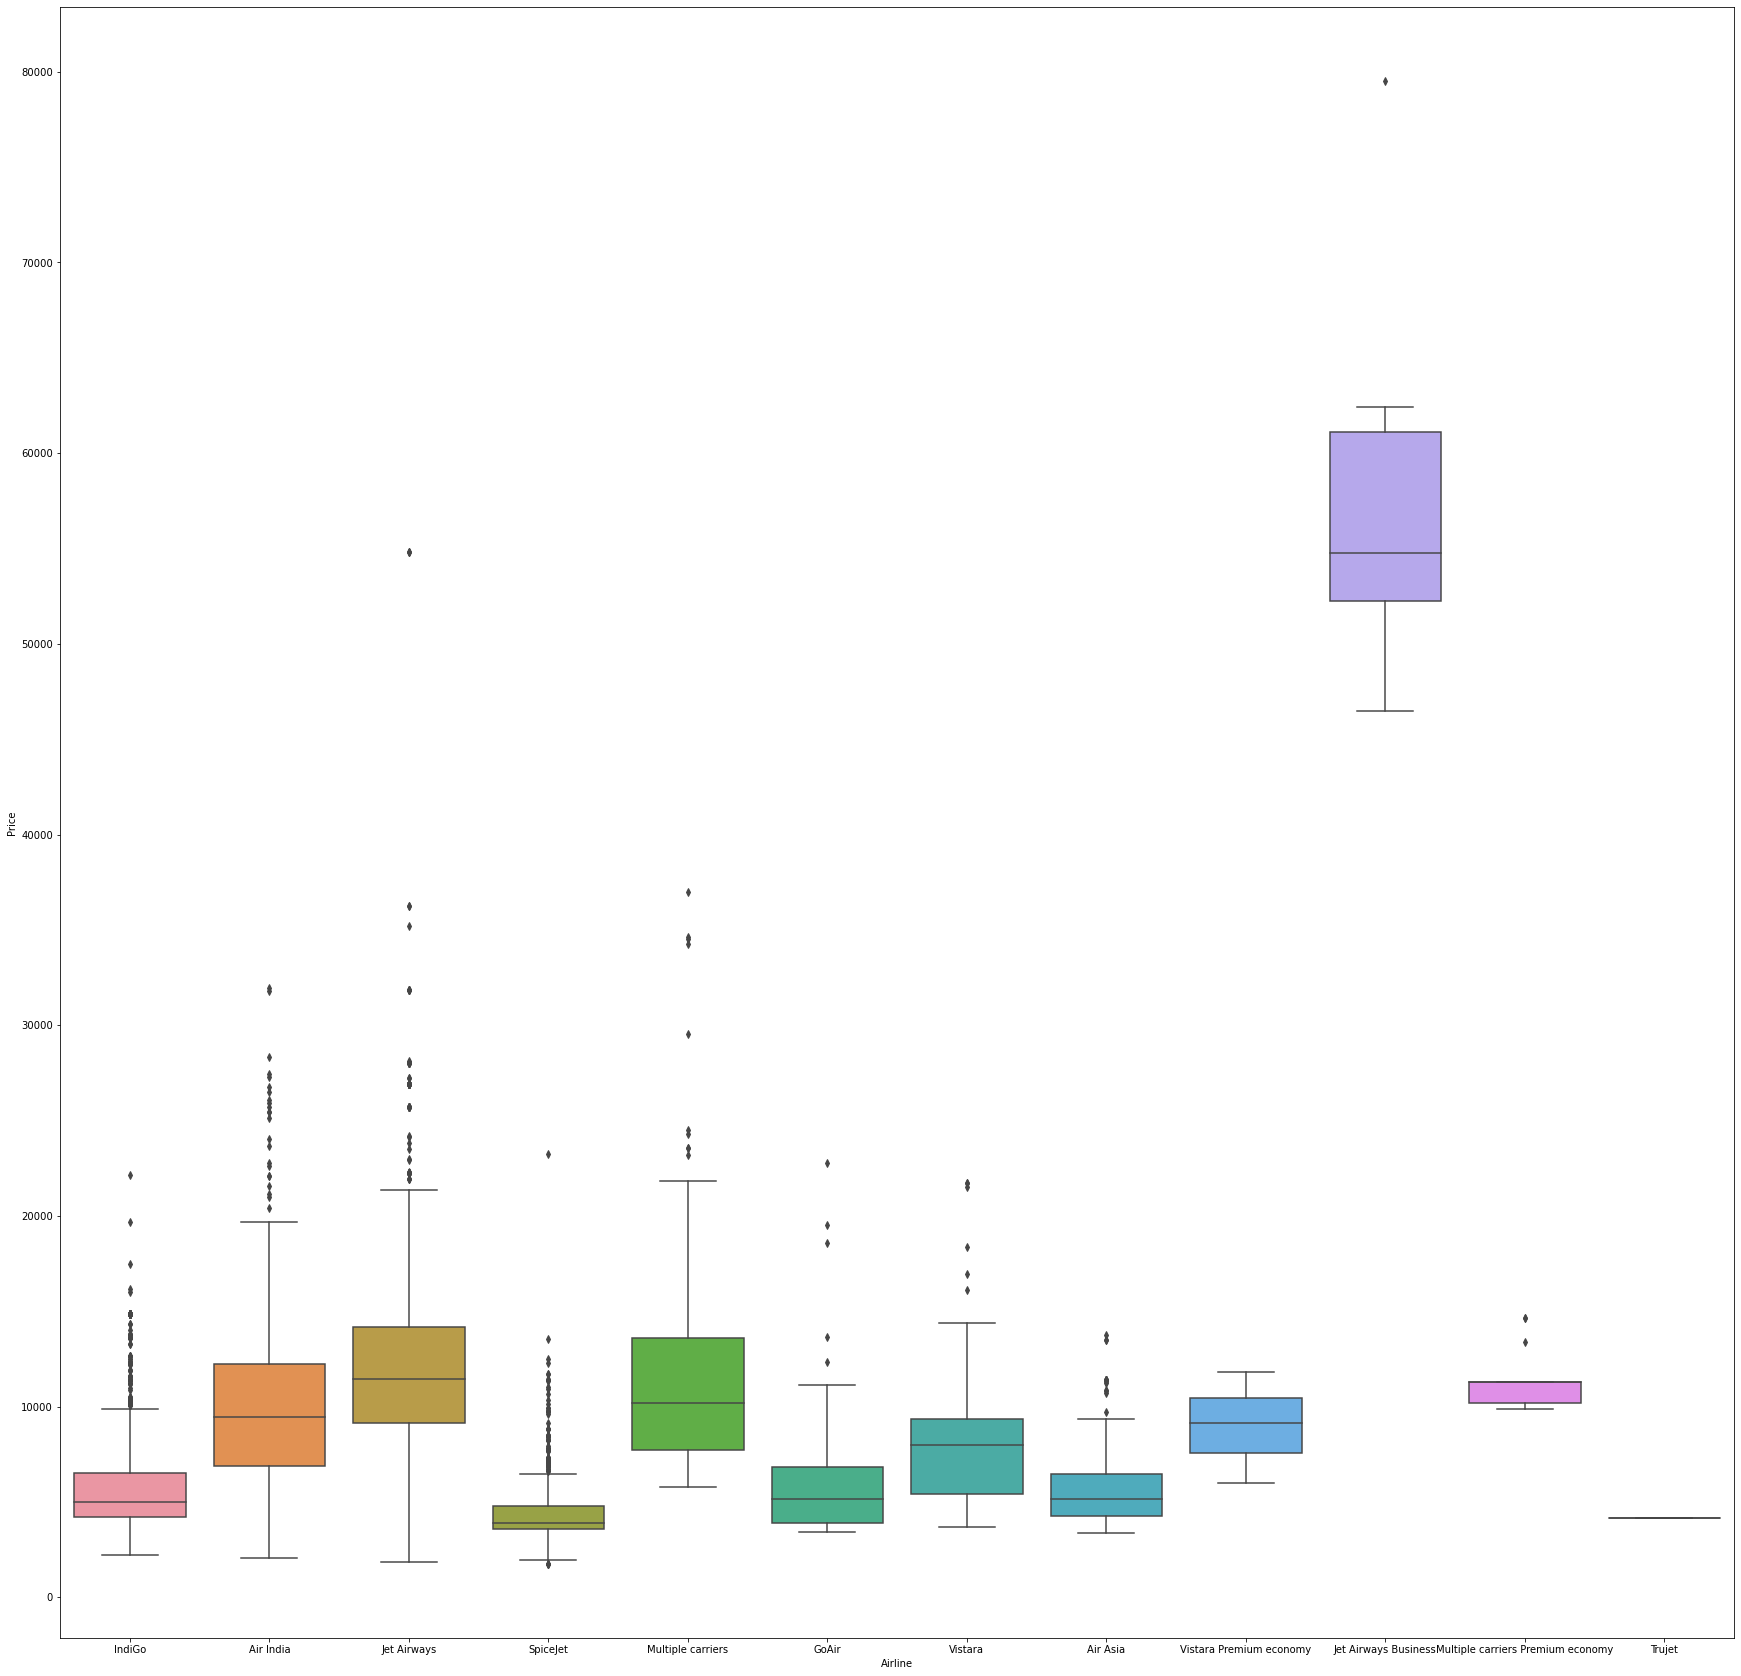

In [66]:
plt.figure(figsize=(30,30))
sns.boxplot(y='Price',x='Airline',data=data)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

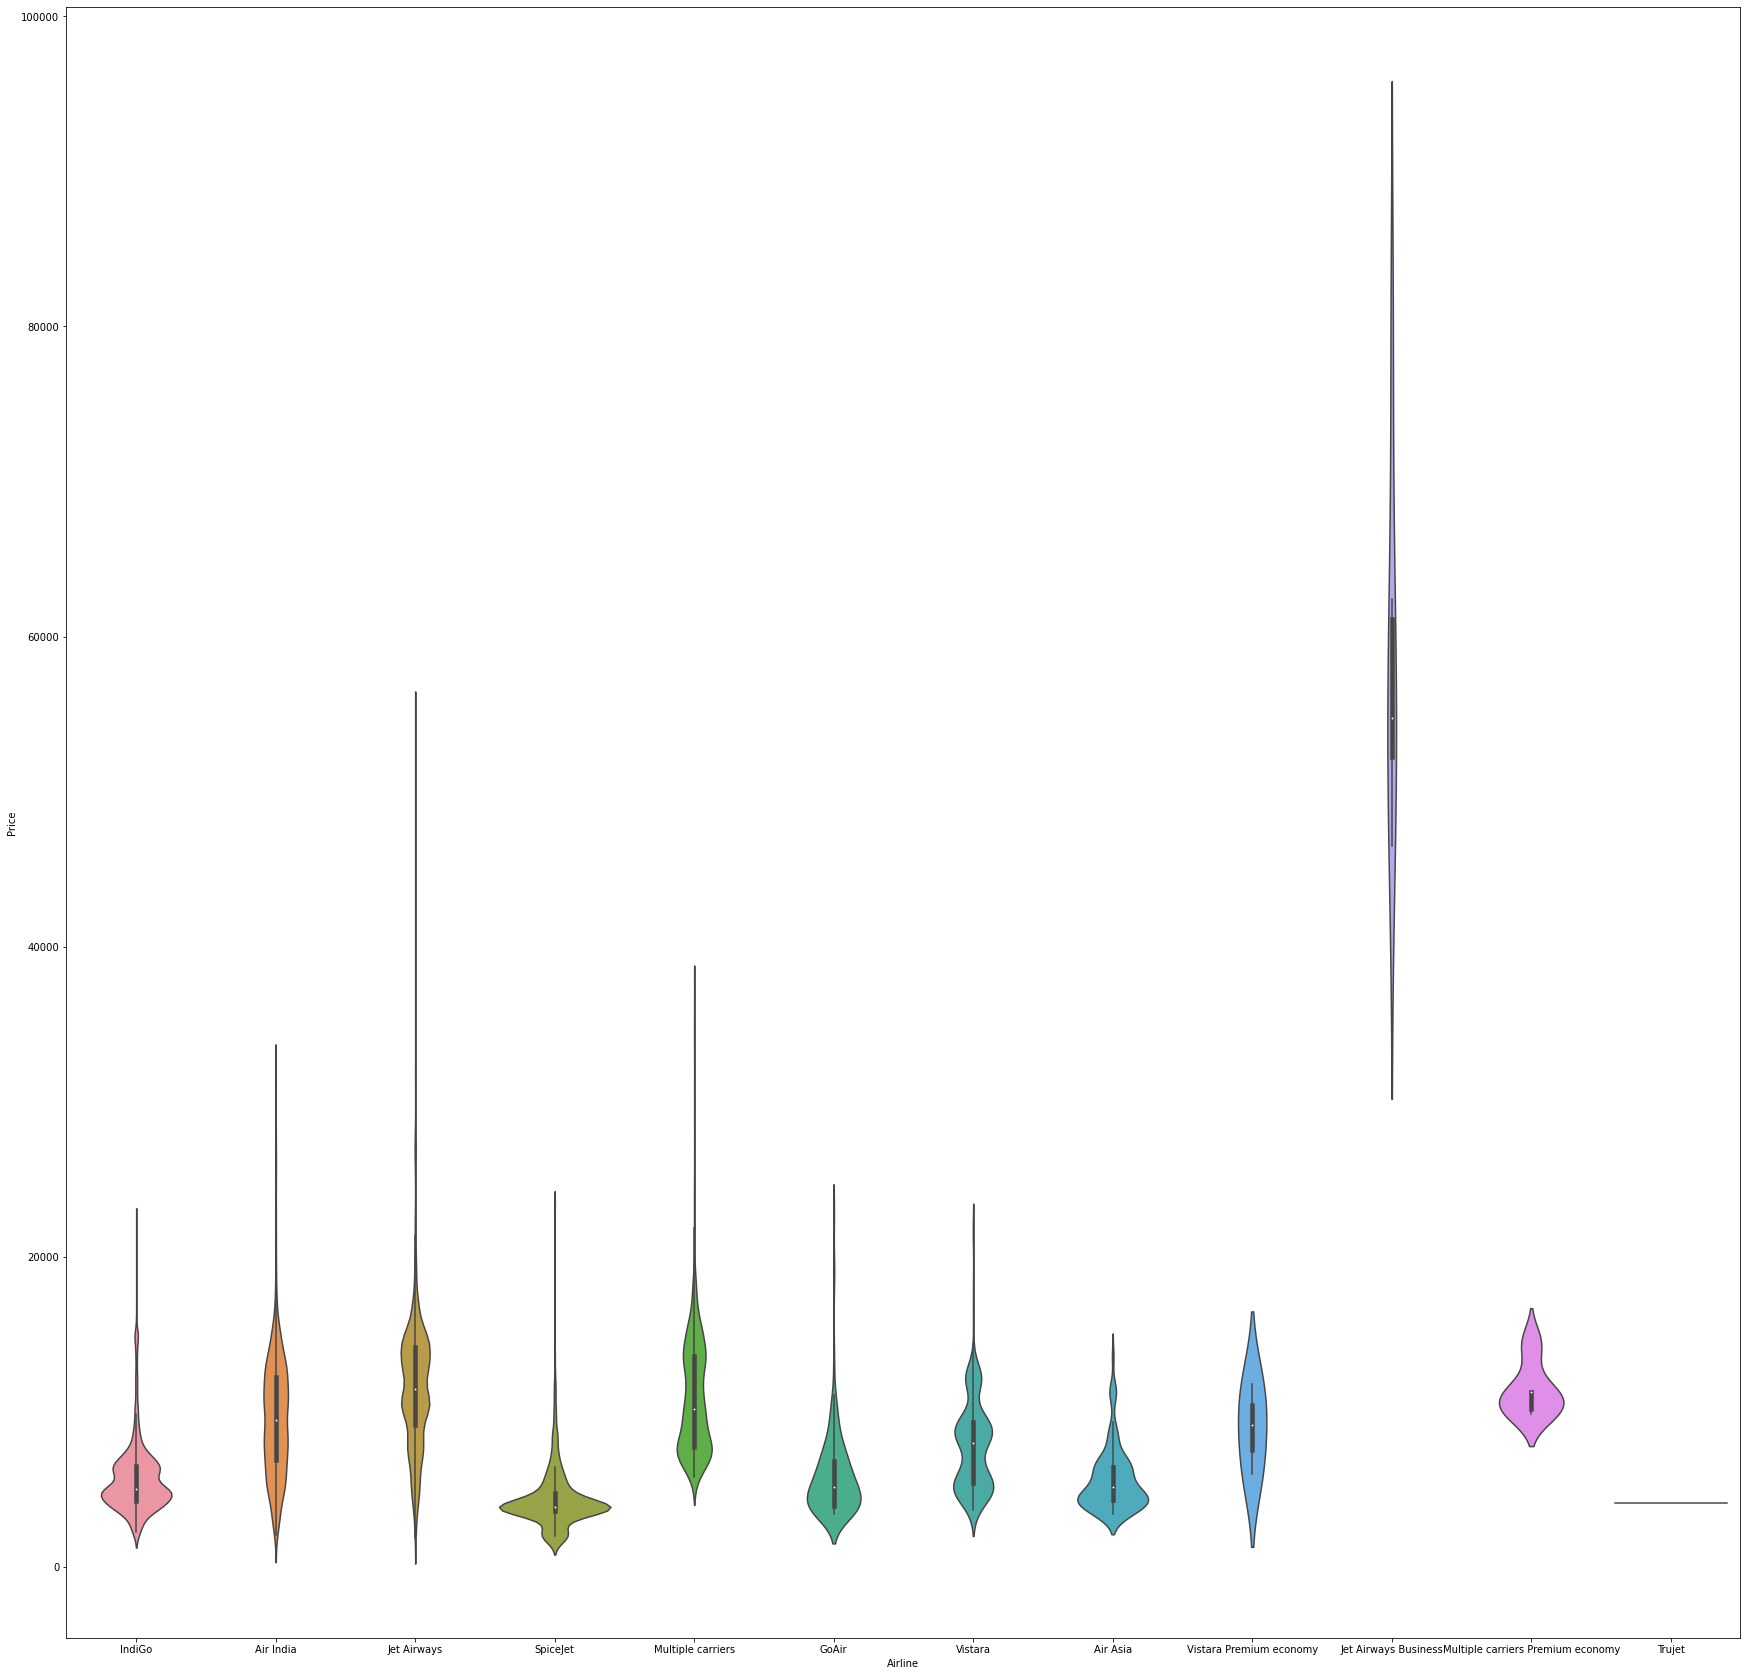

In [67]:
plt.figure(figsize=(30,30))
sns.violinplot(y='Price',x='Airline',data=data)

# Performing Feature-Encoding on Data


In [68]:

#Applying one-hot on data !

In [69]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [70]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_date', 'journey_month',
       'journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_min',
       'total_duration'],
      dtype='object')

In [71]:
#Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column
## lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"


In [72]:
data.drop(columns=['Additional_Info','Route','total_duration','journey_year'],axis=1,inplace=True)

In [73]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25


In [74]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_date', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_min'],
      dtype='object')

In [75]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [76]:
num_col=[col for col in data.columns if data[col].dtype=='int64']

In [77]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [78]:
num_col

['Price',
 'journey_date',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_min']


Handling Categorical Data

basic 2 Encoding Techniques are used to convert Categorical data into some numerical format

if data belongs to Nominal data (ie data is not in any order) -->> OneHotEncoder is used in this case

if data belongs to Ordinal data (ie data is in order ) -->>       LabelEncoder is used in this case



In [79]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [80]:
data['Source'].apply(lambda x: 1 if x=="Banglore" else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [81]:
for category in data['Source'].unique():
    data['Source_'+ category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [82]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [83]:
#above is one hot encoding as there are only some unique classes only

Performing Target Guided Mean Encoding


ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality in ML..

Target Guided Mean Encoding is used in order to get rid of this..

In [84]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [85]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [86]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [87]:
dict={key:index for index,key in enumerate(airlines)}

In [88]:
dict

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [89]:
data['Airline']=data['Airline'].map(dict)

In [90]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [91]:
#similarly traget encoding for destination will be done

In [92]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [93]:
#relacing new delhi wilh delhi as they have the same airport

In [94]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [95]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [96]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [97]:
dict1={key:index for index,key in enumerate(dest)}

In [98]:
dict1

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [99]:
data['Destination']=data['Destination'].map(dict1)

In [100]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [101]:
#total stop is encoded to just the no. of stops

In [102]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [103]:
stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [104]:
data['Total_Stops']=data['Total_Stops'].map(stop)

In [105]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


Performing Outlier Detection 

Here the list of data visualization plots to spot the outliers.

Box and whisker plot (box plot).

Scatter plot.

Histogram.

Distribution Plot.

QQ plot

In [106]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)
                  

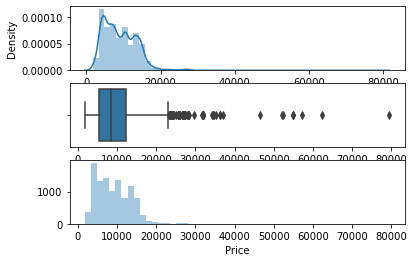

In [107]:
plot(data,'Price')

In [108]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

In [109]:
data['Price'].median()

8372.0

In [110]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

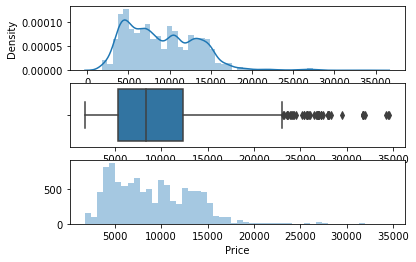

In [111]:
plot(data,'Price')

In [112]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882.0,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218.0,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302.0,3,1,16,50,21,35,4,45,1,0,0,0,0


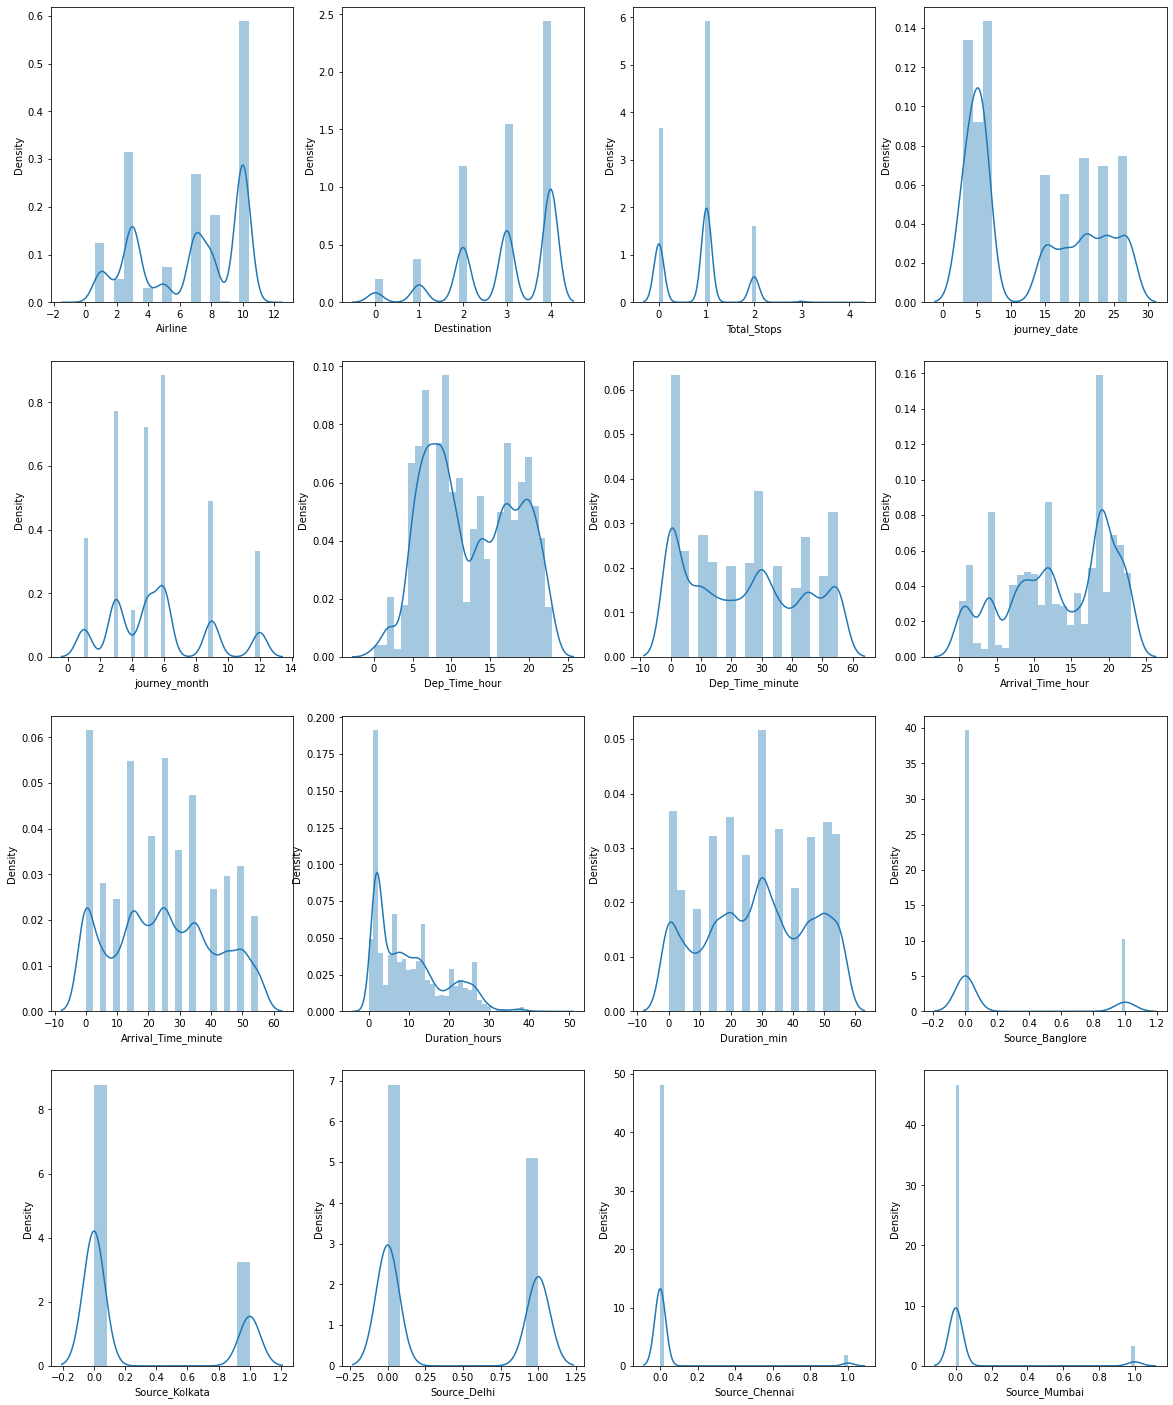

In [115]:
plt.figure(figsize=(20,25))
plotnumber=1

for columns in data.drop(columns=['Price','Source','Duration'],axis=1):
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(data[columns])
    plt.xlabel(columns)
    plotnumber+=1

In [116]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_date,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [117]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [118]:
data.dtypes


Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_date             int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_min             int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [119]:
#using feature selection technique i.e mutual_info_regression based Various statistical test like Chi-sq,Anova & p-value.

In [120]:
from sklearn.feature_selection import mutual_info_regression

In [121]:
x=data.drop(columns='Price',axis=1)

In [122]:
y=data['Price']


In [123]:
mutual_info_regression(x,y)

array([0.96782266, 1.00576082, 0.79561531, 0.18874749, 0.24006563,
       0.34081624, 0.27201646, 0.39784495, 0.35970273, 0.46707602,
       0.34852545, 0.38226851, 0.44856833, 0.52109721, 0.128462  ,
       0.19801828])

In [124]:
imp=pd.DataFrame(mutual_info_regression(x,y),index=x.columns)
imp.columns=["importance"]

In [125]:
#mutual info measures the dependency b/w 2 variables if 0 the 2 varaiable are independent and higher values refers to the higher dependencies

In [126]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.010450
Airline,0.978528
Total_Stops,0.788273
Source_Delhi,0.520331
Duration_hours,0.467257
Source_Kolkata,0.457085
Arrival_Time_hour,0.402072
Source_Banglore,0.383085
Arrival_Time_minute,0.352825
Dep_Time_hour,0.347536


In [127]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_date             int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_min             int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [128]:
imp['importance'].sort_values(ascending=False)

Destination            1.010450
Airline                0.978528
Total_Stops            0.788273
Source_Delhi           0.520331
Duration_hours         0.467257
Source_Kolkata         0.457085
Arrival_Time_hour      0.402072
Source_Banglore        0.383085
Arrival_Time_minute    0.352825
Dep_Time_hour          0.347536
Duration_min           0.344237
Dep_Time_minute        0.254688
journey_month          0.240918
Source_Mumbai          0.197825
journey_date           0.190215
Source_Chennai         0.132511
Name: importance, dtype: float64

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [131]:
x_test

,Airline,Destination,Total_Stops,journey_date,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
6075,8,4,2,21,5,15,5,1,30,10,25,0,0,1,0,0
3544,4,4,1,6,3,10,35,19,35,9,0,0,0,1,0,0
9291,5,3,1,5,9,20,20,9,5,12,45,0,1,0,0,0
5032,3,0,0,24,5,14,45,17,5,2,20,0,0,0,1,0
2483,10,4,1,21,5,22,50,4,25,5,35,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,10,2,1,18,3,16,55,23,0,6,5,1,0,0,0,0
8416,7,4,2,3,3,9,45,9,25,23,40,0,0,1,0,0
2605,3,2,0,21,6,0,25,3,15,2,50,1,0,0,0,0
1392,8,4,1,27,6,17,45,1,30,7,45,0,0,1,0,0


In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [133]:
ml_model=RandomForestRegressor()

In [134]:
ml_model.fit(x_train,y_train)

RandomForestRegressor()

In [135]:
y_pred=ml_model.predict(x_test)

In [137]:
r2_score(y_test,y_pred)

0.8003168728252744

In [135]:
import pickle

In [136]:
file=open(r'C:\Users\DELL\Downloads\flight_fare.pkl','wb')

In [137]:
pickle.dump(ml_model,file)

In [138]:
model=open(r'C:\Users\DELL\Downloads\flight_fare.pkl','rb')

In [139]:
forest=pickle.load(model)

In [140]:
forest.predict(x_test)

array([16733.95,  6290.95,  8743.66, ...,  3496.66,  6336.78,  6953.16])

Defining your own evaluation metric

i.e mean absolute percentage error 

In [150]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [142]:
mape(y_test,forest.predict(x_test))

13.301952510124481

In [143]:
def predict(model):
    model.fit(x_train,y_train)
    print("training_score is {}".format(model.score(x_train,y_train)))
    prediction=model.predict(x_test)
    print("Prediction are {}".format(prediction))
    print("\n")
          
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,prediction)
    print("r2_score is {}".format(r2_score))
    print("mae : ",metrics.mean_absolute_error(y_test,prediction))
    print("mse : ",metrics.mean_squared_error(y_test,prediction))
    print("rmse : ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))
    print("mse : ",mape(y_test,prediction))
          
    sns.distplot(y_test-prediction)

training_score is 0.9514744825658146
Prediction are [16639.71  6482.48  8717.26 ...  3567.65  6281.01  7090.28]


r2_score is 0.8038076206638769
mae :  1190.2920868427818
mse :  3819394.698323853
rmse :  1954.3271727947326
mse :  13.321515629788802


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



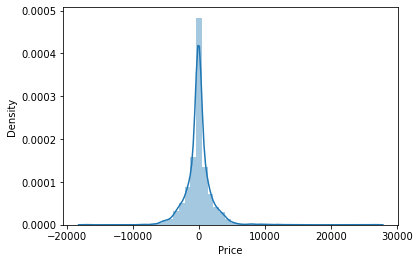

In [144]:
predict(RandomForestRegressor())

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
regression_rf=RandomForestRegressor()

In [147]:
random_grid={
    "n_estimators":[int(x) for x in np.linspace(start=1000,stop=1200,num=6)],
    "max_features":["auto","sqrt"],
    "max_depth":[int(x) for x in np.linspace(start=5,stop=40,num=4)],
    "min_samples_split":[5,10,15,100]
    }

In [148]:
random_forest=RandomizedSearchCV(regression_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)
                        

In [149]:
random_forest.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 16, 28, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [151]:
random_forest.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 16}

In [152]:
randomforest_reg_best=RandomForestRegressor(n_estimators=1200,min_samples_split= 10,max_features= 'auto',max_depth= 16)

In [153]:
randomforest_reg_best.fit(x_train,y_train)

RandomForestRegressor(max_depth=16, min_samples_split=10, n_estimators=1200)

In [154]:
best_predict=randomforest_reg_best.predict(x_test)

In [155]:
best_predict

array([16516.99944228,  6281.68168513,  8654.74384551, ...,
        3705.50850211,  6933.34136759,  7008.82518714])

In [156]:
from sklearn.metrics import r2_score

In [157]:
r2_score(y_test,best_predict)

0.8294640149687044